# Week2_4 Assignment

## [BASIC](#Basic) 
- 커스텀 모듈(`helper.py`)에서 **클래스와 함수를 임포트**할 수 있다.
- **autograd**의 개념 복습


## [CHALLENGE](#Challenge)
- train() 함수에 **epoch, scheduler, grad_clipping**을 추가할 수 있다.
- **validate() 함수를 구현**할 수 있다.


## [ADVANCED](#Advanced)
- train() 함수를 사용해 데이터를 **4 epoch 학습**할 수 있다. 
- **predict 함수를 구현**할 수 있다. 
- **evaluation metric 구현**할 수 있다. 
    - accuracy



### Reference
- [Pytorch Autograd Explain official document](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

In [ ]:
!pip install transformers

In [10]:
import os
import sys
import pandas as pd
import numpy as np 
import torch
import random

In [11]:
# set seed
seed = 7777
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# 현재위치 확인
# os.getcwd()
# !pwd

In [14]:
# helper 모듈을 import하면 이전에 구현했던 다양한 함수 및 클래스를 사용할 수 있음 
# 함수: set_device()
# 함수: custom_collate_fn() 
# 클래스: CustomDataset
# 클래스: CustomClassifier
# 가 import 됨


from helper import *
from torch.utils.data import RandomSampler, SequentialSampler

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [15]:
# device
device = set_device()
print(f"device: {device}")

cpu
device: None


## Basic

### 모듈에서 클래스와 함수를 임포트해 다음을 구현
- train_dataset, train_dataloader
- valid_dataset, valid_dataloader
- test_dataset, test_dataloader

In [16]:
# train dataframe 다운로드
!wget https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/e56006adfac42f8a2975db0ebbe60eacbe1c6b11/data/sample_df.csv

--2022-03-23 19:17:33--  https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/e56006adfac42f8a2975db0ebbe60eacbe1c6b11/data/sample_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 971625 (949K) [text/plain]
Saving to: ‘sample_df.csv’

sample_df.csv       100%[===================>] 948.85K  --.-KB/s    in 0.05s   

2022-03-23 19:17:33 (19.7 MB/s) - ‘sample_df.csv’ saved [971625/971625]



In [17]:
# test dataframe 다운로드
!wget https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/main/data/sample_df_test.csv

--2022-03-23 19:17:34--  https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/main/data/sample_df_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101383 (99K) [text/plain]
Saving to: ‘sample_df_test.csv’

sample_df_test.csv  100%[===================>]  99.01K  --.-KB/s    in 0.02s   

2022-03-23 19:17:35 (6.11 MB/s) - ‘sample_df_test.csv’ saved [101383/101383]



In [18]:
# 학습 & 평가 데이터셋 로드
# 학습 및 평가 샘플 데이터 개수는 각각 10,000개, 1,000개

df_train = pd.read_csv('sample_df.csv')
df_test = pd.read_csv('sample_df_test.csv')

print(f"train shape : {df_train.shape}")
print(f"test shape : {df_test.shape}")

train shape : (10000, 3)
test shape : (1000, 3)


In [19]:
df_train.head()

,id,document,label
0,8525343,나 이거 더빙을 누가하는지 모르고 봤는데 왠지 더빙이 구리더라...더빙이 너무 별로였음.,0
1,4572888,현암이 소지섭이었으면 좋았겠는데..스토리각색도 좀 깔끔하게...,0
2,8504845,"ㅎㅎㅎ 대단하네 ㅜ,.ㅡ",0
3,5003367,이거보고 돈날린 기억이...........,0
4,3015049,한국영화 어쩌다 이지경까지 ㅠㅠ,0


In [20]:
# Dataset 구현
# helper.py에 있는 CustomDataset 활용하여 train datset, test dataset 만들기

train_dataset = CustomDataset(df_train['document'], df_train['label'])
test_dataset = CustomDataset(df_test['document'], df_test['label'])

print(f"Train Dataset len: {len(train_dataset)}")
print(f"Train Dataset 1st element: {train_dataset[0]}")

print(f"Test Dataset len: {len(test_dataset)}")
print(f"Test Dataset 1st element: {test_dataset[0]}")


Train Dataset len: 10000
Train Dataset 1st element: ('나 이거 더빙을 누가하는지 모르고 봤는데 왠지 더빙이 구리더라...더빙이 너무 별로였음.', 0)
Test Dataset len: 1000
Test Dataset 1st element: ('신용문객잔 보고 후속편인줄 알고 봤더만 완전 개판이네 18.. 이련결 그냥 절에나 쳐 들어 가라.. 회오리에서 싸우는 신 참 가관이더라 .. 서극도 완전 쓰레기 감독이 다 됐구나.. 액션도 쓰레기고 배우들 연기도 참 가관이더라 18', 0)


In [21]:
from torch.utils.data import random_split

In [22]:
# Train Dataset을 학습과 검증 셋으로 분리
# 학습 셋과 검증 셋의 비율은 9:1
# torch.utils.data에서 제공되는 데이터 세트를 임의로 분할할 수 있는 함수 찾아서 사용
n_train_sample = df_train.shape[0]

n_train = int(n_train_sample*0.9)
n_valid = n_train_sample - n_train 
train_dataset, valid_dataset = random_split(train_dataset, [n_train, n_valid])

print(f"Train dataset len: {len(train_dataset)}")
print(f"Valid dataset len: {len(valid_dataset)}")

Train dataset len: 9000
Valid dataset len: 1000


In [23]:
train_dataset[:4]

(7974             나는 행복해지고 싶다. 또한 다른 사람을 행복하게 만드는 사람이고 싶다.
 5660            이런 명작을 오늘 티비에서 봤는데 핵꿀잼이네요 10점이상 주고 싶을정도네요
 4367    정애리는 툭하면 아랫사람 빰을 사정없이 때리는군요.뭐이런 개같은 경우가 있는지.막장...
 2400                              키타노다케시의 소나티네는 간결하기라도하지.
 Name: document, dtype: object, 7974    1
 5660    1
 4367    0
 2400    0
 Name: label, dtype: int64)

In [48]:
# DataLoader 구현
# train과 validation의 batch size는 각각 32, 64로 설정
# test의 batch size는 validation과 동일
# train에 사용할 DataLoader에서는 sampler로 RandomSampler 사용
# validation과 test에 사용할 DataLoader에서는 sampler로 SequentialSampler 사용
# 모든 DataLoader의 collate_fn은 helper.py에 있는 custom_collate_fn 사용

train_batch_size = 32
valid_batch_size = 64

train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    sampler=RandomSampler(train_dataset),
    collate_fn=custom_collate_fn
)

valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=train_batch_size,
    sampler=SequentialSampler(valid_dataset),
    collate_fn=custom_collate_fn
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=train_batch_size,
    sampler=SequentialSampler(test_dataset),
    collate_fn=custom_collate_fn
)

print(f"Train dataloader # steps: {len(train_dataloader)}")
print(f"Valid dataloader # steps: {len(valid_dataloader)}")
print(f"Test dataloader # steps: {len(test_dataloader)}")

Train dataloader # steps: 282
Valid dataloader # steps: 32
Test dataloader # steps: 32


### `auto_grad` 개념 복습
- torch의 `auto_grad` 기능
    - pytorch는 `requires_grad` 파리미터의 값이 True인 텐서에 한해서 미분값을 자동으로 계산한다.
    - 미분값은 `loss.backward()` 가 호출될 때 자동으로 계산된다.

In [25]:
from transformers import BertTokenizer, BertModel
tokenizer_bert = BertTokenizer.from_pretrained("klue/bert-base")

#### 해결해야 할 오류
 *Error : BertModel이 인식되지 않는 오류* 
 - CustomClassifier 클래스를 다시 정의해주고 문제푼 이후에 해결 해볼 것.
 - 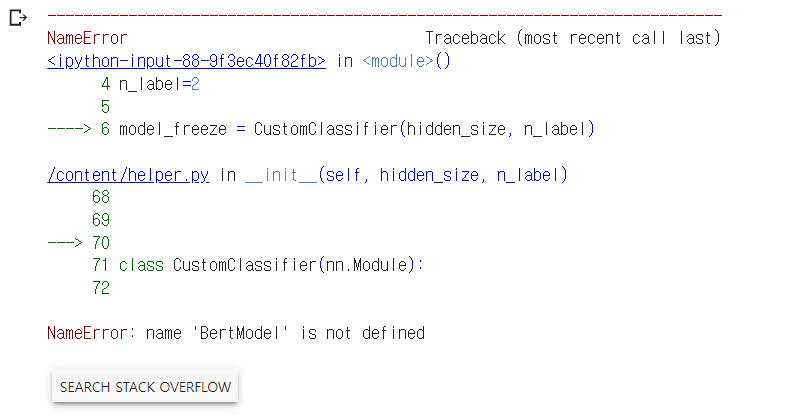

In [50]:
# helper.py에 있는 CustomClassifier 모델을 로드해 model_freeze 변수에 instance를 생성
# freeze_base=True
hidden_size=768
n_label=2

model_freeze = CustomClassifier(hidden_size, n_label)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:
# model_freeze 모델의 모든 파라미터를 출력해보고 아래 질문에 답해 보자

"""
변수명은 model_freeze 이지만 
model unfreeze 모델이라고 생각하고 푸시면 될 것 같습니다.
"""
model_freeze.get_parameter

<bound method Module.get_parameter of CustomClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [32]:
for name, param in model_freeze.named_parameters():
    print(f"Param Name: {name}, Shape: {param.shape}, Grad: {param.requires_grad}")

Param Name: bert.embeddings.word_embeddings.weight, Shape: torch.Size([32000, 768]), Grad: True
Param Name: bert.embeddings.position_embeddings.weight, Shape: torch.Size([512, 768]), Grad: True
Param Name: bert.embeddings.token_type_embeddings.weight, Shape: torch.Size([2, 768]), Grad: True
Param Name: bert.embeddings.LayerNorm.weight, Shape: torch.Size([768]), Grad: True
Param Name: bert.embeddings.LayerNorm.bias, Shape: torch.Size([768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.query.weight, Shape: torch.Size([768, 768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.query.bias, Shape: torch.Size([768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.key.weight, Shape: torch.Size([768, 768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.key.bias, Shape: torch.Size([768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.value.weight, Shape: torch.Size([768, 768]), Grad: True
Param Name: bert.encoder.layer.0.attention

In [ ]:
model_freeze.classifier[0].weight.backward

<bound method Tensor.backward of Parameter containing:
tensor([[-0.0175, -0.0060, -0.0251,  ...,  0.0293, -0.0258, -0.0341],
        [ 0.0007, -0.0295, -0.0096,  ..., -0.0269,  0.0298,  0.0083],
        [ 0.0201,  0.0189, -0.0330,  ..., -0.0082,  0.0135,  0.0053],
        ...,
        [ 0.0178,  0.0220,  0.0258,  ...,  0.0003,  0.0011,  0.0074],
        [ 0.0020, -0.0170, -0.0345,  ..., -0.0314, -0.0292, -0.0003],
        [-0.0113, -0.0169, -0.0195,  ..., -0.0068,  0.0018,  0.0051]],
       requires_grad=True)>

In [ ]:
model_freeze.bert.encoder.layer[0].attention.self.query.weight

Parameter containing:
tensor([[ 0.0136,  0.0162, -0.0616,  ..., -0.0227, -0.0551, -0.0385],
        [ 0.0549, -0.0462, -0.0229,  ...,  0.0028, -0.0088,  0.0135],
        [ 0.0275,  0.0846,  0.0093,  ..., -0.0018,  0.0184, -0.0297],
        ...,
        [ 0.0105, -0.0079, -0.0426,  ...,  0.0378, -0.0219,  0.0065],
        [-0.0283,  0.0635,  0.0240,  ...,  0.0183,  0.0244, -0.0108],
        [ 0.0601, -0.0081,  0.0419,  ...,  0.0085,  0.0259,  0.0199]],
       requires_grad=True)

### `auto_grad` 개념 및 모델 구조 복습을 위해 다음 항목에 답해 보자
- `bert.encoder.layer.0.attention.self.query.weight` 텐서의 gradient는 True인 상태인가?
> True
- `classifier.0.weight` 텐서의 shape은? 
> torch.Size([32, 768])
- `classifier.0.weight` 텐서는 freeze 상태인가 ? 
> False
- `classifier.0.weight` 텐서의 gradient 값은 무엇인가? 
> None

### 위 모델 (`model_freeze`)의 모든 파라미터의 gradient를 freeze 해보자

In [33]:
# 모든 파라미터의 gradient를 freeze 해보고 제대로 변경되었는지 확인하기 위해 모델의 모든 파라미터를 출력해보자.
for name, param in model_freeze.named_parameters():
    print(f"Param Name: {name}, Shape: {param.shape}, Grad: {param.requires_grad}")

Param Name: bert.embeddings.word_embeddings.weight, Shape: torch.Size([32000, 768]), Grad: True
Param Name: bert.embeddings.position_embeddings.weight, Shape: torch.Size([512, 768]), Grad: True
Param Name: bert.embeddings.token_type_embeddings.weight, Shape: torch.Size([2, 768]), Grad: True
Param Name: bert.embeddings.LayerNorm.weight, Shape: torch.Size([768]), Grad: True
Param Name: bert.embeddings.LayerNorm.bias, Shape: torch.Size([768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.query.weight, Shape: torch.Size([768, 768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.query.bias, Shape: torch.Size([768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.key.weight, Shape: torch.Size([768, 768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.key.bias, Shape: torch.Size([768]), Grad: True
Param Name: bert.encoder.layer.0.attention.self.value.weight, Shape: torch.Size([768, 768]), Grad: True
Param Name: bert.encoder.layer.0.attention

## Challenge

### `scheduler` 를 생성 
- 스케쥴러를 알기 전에 먼저 `epoch`의 개념을 알아야 한다. Epoch는 dataset를 **몇 번 반복**해 학습할 것인지를 의미한다. 만약 dataset의 개수가 2,000개이고 epoch을 2번 학습하게 되면 총 4,000개의 데이터를 학습하게 된다.   
- 스케쥴러는 epoch에 따라 learning rate의 값을 조정하는 것을 의미한다. 
- 예를 들어 [여기](https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.get_linear_schedule_with_warmup)의 그림에서 볼 수 있듯이 `get_linear_schedule_with_warmup`는 특정 step까지는 learning rate를 천천히 상승시키다가 고점에 도달하면 다시 하락시킨다. 

### `model`, `optimizer`, `scheduler`를 초기화(=인스턴스 생성)하는 함수를 구현하라

In [36]:
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from torch.nn.utils import clip_grad_norm_
from transformers import get_linear_schedule_with_warmup, get_constant_schedule

In [43]:
# model:CustomClassifier 사용, hidden size는 768, label 개수는 2
# optimizer: AdamW 사용, learning rate는 2e-5
# scheduler: transformers.get_linear_schedule_with_warmup 함수 사용, 단, num_warmup_steps 매개 변수는 사용하지 않음

def initializer(train_dataloader, epochs=2):
    """
    모델, 옵티마이저, 스케쥴러를 초기화한 후 반환
    """
    
    model = CustomClassifier(hidden_size, n_label)

    optimizer = AdamW(
        model.parameters(), # update 대상 파라미터를 입력
        lr=2e-5,
        eps=1e-8
    )
    
    total_steps = len(train_dataloader) * epochs
    print(f"Total train steps with {epochs} epochs: {total_steps}")

    scheduler = get_linear_schedule_with_warmup(
        optimizer, 
        num_warmup_steps = 0,
        num_training_steps = total_steps
    )

    return model, optimizer, scheduler

### model, optimizer, scheduler의 파라미터 저장하는 함수를 구현하라

In [40]:
# 모델 저장 함수 구현

def save_checkpoint(path, model, optimizer, scheduler, epoch, loss):
    file_name = f'{path}/model.ckpt.{epoch}'
    
    # torch.save 함수 참고
    torch.save(
        {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'loss' : loss
        }, 
        file_name
    )
    
    print(f"Saving epoch {epoch} checkpoint at {file_name}")

### `validate()` 함수 구현 
- `validate()` 함수 내 model의 상태는 **evaluate**이어야 한다. evaluate 상태의 model은 dropout을 진행하지 않는다. 
- **forward**를 진행할 때 `with torch.no_grad(): ...` 설정해 미분 계산을 방지한다.


In [45]:
# input: model, valid_dataloader
# output: loss, 정확도

def validate(model, valid_dataloader):
#   global loss_fct
   
    # 모델을 evaluate 모드로 설정 & device 할당
    model.eval()
    model.to(device)
    
    total_loss, total_acc= 0,0
        
    for step, batch in enumerate(valid_dataloader):
        
        # tensor 연산 전, 각 tensor에 device 할당
        batch = None
            
        batch_input, batch_label = batch
            
        # gradient 계산하지 않고 forward 진행
        with torch.no_grad():
            logits = model(**batch_input)
            
        # loss
        loss = loss_fct(logits, batch_label)
        total_loss += loss.item()
        
        # accuracy
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1).flatten()
        acc = (preds == batch_label).cpu().numpy().mean()
        total_acc+=acc
    
    total_loss = total_loss/(step+1)
    total_acc = total_acc/(step+1)*100

    return total_loss, total_acc


### `train()` 함수에 `epoch`와 `clip_grad_norm` 추가
- data_loader를 `epoch`만큼 반복하면서 학습하도록 `train()` 함수를 수정하라
- `gradient cliping`은 미분 값 너무 큰 경우 gradient exploding되는 현상을 막기 위해 미분값이 `threshold`를 넘을 경우 특정 비율을 미분 값에 곱해 크기를 줄여준다.
- Reference
  - [clip_grad_norm_ official document](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html)
  - [그래디언트 클립핑 설명 한국어 블로그](https://kh-kim.gitbook.io/natural-language-processing-with-pytorch/00-cover-6/05-gradient-clipping)

In [57]:
# 위에서 구현한 모델 저장 함수(save_checkpoint)와 validate 함수도 추가해보자

loss_fct = CrossEntropyLoss()

def train(model, train_dataloader, valid_dataloader=None, epochs=2):
        # global scheduler, loss_fct
        
        # train_dataloaer 학습을 epochs만큼 반복
        for epoch in range(epochs):
            print(f"*****Epoch {epoch} Train Start*****")
            
            # 배치 단위 평균 loss와 총 평균 loss 계산하기위해 변수 생성
            total_loss, batch_loss, batch_count = 0,0,0
        
            # model을 train 모드로 설정 & device 할당
            model.train()
            model.to(device)
            
            # data iterator를 돌면서 하나씩 학습
            for step, batch in enumerate(train_dataloader):
                batch_count+=1
                
                # tensor 연산 전, 각 tensor에 device 할당
                batch = tuple(item.to(device) for item in batch)
            
                batch_input, batch_label = batch
            
                # batch마다 모델이 갖고 있는 기존 gradient를 초기화
                model.zero_grad()
            
                # forward
                logits = model(**batch_input)
            
                # loss
                loss = loss_fct(logits, batch_label)
                batch_loss += loss.item()
                total_loss += loss.item()
            
                # backward -> 파라미터의 미분(gradient)를 자동으로 계산
                loss.backward()
                
                # gradient clipping 적용 (max_norm = 1)
                clip_grad_norm_(model.parameters(), 1.0)
                
                # optimizer & scheduler 업데이트
                optimizer.step()
                scheduler.step()
                
                # 배치 10개씩 처리할 때마다 평균 loss와 lr를 출력
                if (step % 10 == 0 and step != 0):
                    learning_rate = optimizer.param_groups[0]['lr']
                    print(f"Epoch: {epoch}, Step : {step}, LR : {learning_rate}, Avg Loss : {batch_loss / batch_count:.4f}")

                    # reset 
                    batch_loss, batch_count = 0,0

            print(f"Epoch {epoch} Total Mean Loss : {total_loss/(step+1):.4f}")
            print(f"*****Epoch {epoch} Train Finish*****\n")
            
            if valid_dataloader is not None:
                print(f"*****Epoch {epoch} Valid Start*****")
                valid_loss, valid_acc = validate(model, valid_dataloader)
                print(f"Epoch {epoch} Valid Loss : {valid_loss:.4f} Valid Acc : {valid_acc:.2f}")
                print(f"*****Epoch {epoch} Valid Finish*****\n")
            
            # checkpoint 저장
            save_checkpoint(".", model, optimizer, scheduler, epoch, total_loss/(step+1))
                
        print("Train Completed. End Program.")

## Advanced

### 학습 데이터를 epoch 4까지 학습
- 매 epoch마다 다음을 수행한다.
  - 학습이 끝난 후 validate() 함수 실행 
  - validate() 함수가 끝난 후 model save 함수 실행

In [ ]:
# 4 epoch 학습
epochs=4
model, optimizer, scheduler = initializer(train_dataloader, epochs)
train(model, train_dataloader, valid_dataloader, epochs)

### 가장 dev acc 성능이 높았던 epoch의 모델의 체크 포인트를 불러와 로드하자

In [ ]:
# torch.load 함수 사용

checkpoint = None

In [ ]:
# checkpoint의 key 종류를 확인
checkpoint.keys()

In [ ]:
# 위에서 구현한 initializer 함수 사용하여 model, optimizer, scheduler 초기화

epochs=1
model, optimizer, scheduler = None

In [ ]:
model.load_state_dict(checkpoint["model_state_dict"])

### 모델 예측 함수 구현
- test_dataloader를 입력받아 모델이 예측한 확률값 (probs)과 실제 정답 (label) 을 출력하는 `predict()` 함수를 구현하자.
- 함수 정의
  - 입력 매개변수
    - `model` : `CustomClassifier` 모델. logits를 반환함 
    - `test_dataloader` : test 데이터셋의 텍스트와 레이블을 배치로 갖는 dataloader
  - 조건
    - `test_dataloader`는 이터레이터기 때문에 이터레이터를 순회하면서 `all_logits` 리스트에 배치 단위의 logits를 저장하고 `all_labels` 리스트에 배치 단위의 레이블 (0 또는 1 값)을 저장하라
  - 반환값
    - `probs`
      - logits에 softmax 함수를 취한 확률값. (test data 개수, label 개수) shape을 가짐. np.array 타입으로 데이터 타입을 변환할 것.
    - `labels`
      - 0 또는 1 값을 갖는 np.array. (test data 개수,) shape을 가짐.

In [ ]:
def predict(model, test_dataloader):
    """
    test_dataloader의 label별 확률값과 실제 label 값을 반환
    """

    # model을 eval 모드로 설정 & device 할당
    None

    all_logits = []
    all_labels = []

    for step, batch in enumerate(test_dataloader):
        
        batch_input, batch_label = batch
        
        # batch_input을 device 할당
        None

        # model에 batch_input을 넣어 logit 반환 & all_logits, all_labels 리스트에 값 추가 
        None
    

    probs = None # logits을 확률값으로 변환 & Tensor 타입을 numpy.array 타입으로 변환
    all_labels = None #  Tensor 타입을 numpy.array 타입으로 변환

    return probs, all_labels



- 모델이 예측한 확률값과 실제 label을 입력 받아 정확도를 출력하는 **accuracy()** 함수를 구현하자. 
- 함수 정의 
  - 입력 매개변수 
    - `probs` : `predict()` 함수의 반환값. 2차원의 np.array
    - `labels` : `predict()` 함수의 반환값. 1차원의 np.array
  - 조건
    - `probs`의 확률값이 0.5 이상이면 1, 이하이면 0이 되도록 만든다. 모델이 예측한 레이블을 실제값(`labels`)과 비교해 예측값과 실제값이 같으면 1, 다르면 0 점수를 준다. 모든 데이터에 대해 점수의 평균값이 accuracy 값이다. 
  - 반환값 
    - `acc` : 정확도 (Float type)

In [ ]:
# accuracy 함수 구현
def accuracy(probs, labels):
    y_pred = None # probs(확률값)을 label로 변경(0.5 이상이면 1, 0.5 미만이면 0)
    acc = None # 정확도 계산
    return acc 

In [ ]:
probs, labels = predict(model, test_dataloader)

In [ ]:
accuracy(probs, labels)

### `sklearn.metrics`의 `accuracy_score`, `roc_auc_score` 함수를 이용해 정확도와 auc를 계산하라

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
# 정확도 출력

None

In [ ]:
# auc 출력

None